In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from locale import atof
import locale
locale.setlocale(locale.LC_NUMERIC, '')
%matplotlib inline

In [2]:
df = pd.read_csv("corona.csv", skipfooter=1)

/home/ipd/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.tail()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
145,St. Vincent Grenadines,1,NaN,NaN,NaN,NaN,1,NaN,NaN
146,Suriname,1,NaN,NaN,NaN,NaN,1,NaN,NaN
147,Eswatini,1,+1,NaN,NaN,NaN,1,NaN,0.9
148,Togo,1,NaN,NaN,NaN,NaN,1,NaN,0.1
149,U.S. Virgin Islands,1,+1,NaN,NaN,NaN,1,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     150 non-null    object 
 1   TotalCases        150 non-null    int64  
 2   NewCases          91 non-null     object 
 3   TotalDeaths       46 non-null     float64
 4   NewDeaths         23 non-null     float64
 5   TotalRecovered    65 non-null     float64
 6   ActiveCases       150 non-null    int64  
 7   Serious,Critical  47 non-null     float64
 8   Tot Cases/1M pop  110 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 10.7+ KB


In [5]:
df["NewCases"] = df["NewCases"].apply(lambda x: x is not None and type(x) is str and atof(x.split('+')[1]))

In [6]:
df["NewCases"] = df["NewCases"].replace(False, 0)

In [7]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2
1,Italy,21157,3497.0,1441.0,175.0,1966.0,17750,1518.0,349.9
2,Iran,12729,1365.0,611.0,97.0,4339.0,7779,NaN,151.5
3,S. Korea,8086,107.0,72.0,5.0,714.0,7300,59.0,157.7
4,Spain,6313,1081.0,193.0,60.0,517.0,5603,293.0,135.0


In [8]:
con = df[df["Country,Other"] == "China"]

In [9]:
china = con.drop("Country,Other", axis=1)

In [10]:
china

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2


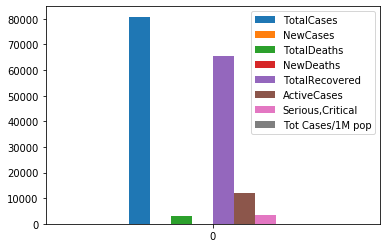

In [11]:
china.plot.bar(rot=0)

matplotlib.axes._subplots.AxesSubplot

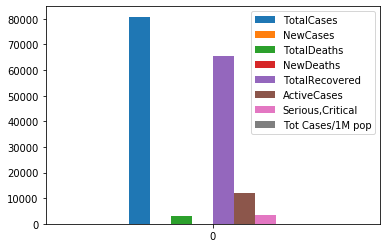

In [12]:
type(china.plot.bar(rot=0))

In [13]:
from matplotlib.figure import Figure

In [14]:
fig = Figure()

In [15]:
ax = fig.add_subplot()

In [16]:
ax.plot(([1, 2, 3, 4], [12, 212, 342, 123]))

In [17]:
plt.show()

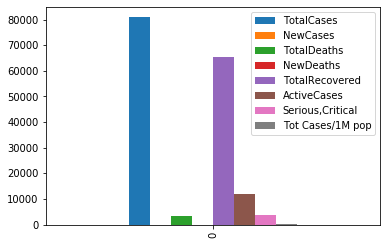

In [18]:
china.plot.bar()

In [19]:
china.iloc[0].values

array([8.0824e+04, 1.1000e+01, 3.1890e+03, 1.3000e+01, 6.5573e+04,
       1.2062e+04, 3.6100e+03, 5.6200e+01])

([<matplotlib.axis.XTick at 0x7f5aaf1b4090>,
 <a list of 8 Text xticklabel objects>)

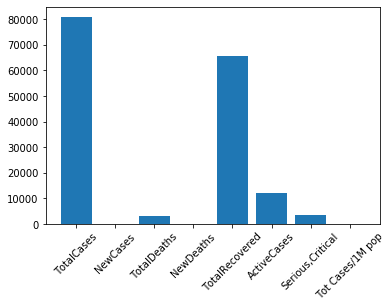

In [20]:
plt.bar(range(8), china.iloc[0].values)
plt.xticks(range(8), china.columns, rotation=45)

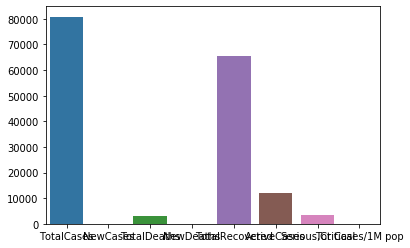

In [28]:
bar = sns.barplot(x=china.columns, y=china.iloc[0].values)

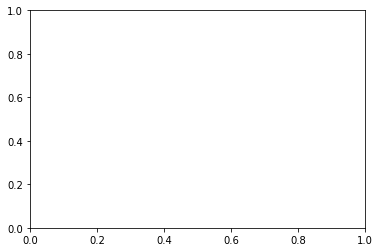

In [30]:
fig, ax = plt.subplots()

In [31]:
sns.barplot(x=china.columns, y=china.iloc[0].values, ax=ax)

In [32]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

[Text(0.0, 0, 'TotalCases'),
 Text(0.2, 0, 'NewCases'),
 Text(0.4, 0, 'TotalDeaths'),
 Text(0.6000000000000001, 0, 'NewDeaths'),
 Text(0.8, 0, 'TotalRecovered'),
 Text(1.0, 0, 'ActiveCases'),
 Text(0, 0, 'Serious,Critical'),
 Text(0, 0, 'Tot\xa0Cases/1M pop')]

In [33]:
fig.tight_layout()

In [34]:
plt.show()

In [35]:
con

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2


In [38]:
con.replace("NaN", 0)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2


In [39]:
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80824,11.0,3189.0,13.0,65573.0,12062,3610.0,56.2
1,Italy,21157,3497.0,1441.0,175.0,1966.0,17750,1518.0,349.9
2,Iran,12729,1365.0,611.0,97.0,4339.0,7779,NaN,151.5
3,S. Korea,8086,107.0,72.0,5.0,714.0,7300,59.0,157.7
4,Spain,6313,1081.0,193.0,60.0,517.0,5603,293.0,135.0
...,...,...,...,...,...,...,...,...,...
145,St. Vincent Grenadines,1,0.0,NaN,NaN,NaN,1,NaN,NaN
146,Suriname,1,0.0,NaN,NaN,NaN,1,NaN,NaN
147,Eswatini,1,1.0,NaN,NaN,NaN,1,NaN,0.9
148,Togo,1,0.0,NaN,NaN,NaN,1,NaN,0.1


In [40]:
con = df[df["Country,Other"] == "singapore".title()]

In [41]:
con

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
25,Singapore,212,12.0,NaN,NaN,97.0,115,11.0,36.2


In [42]:
con.replace("NaN", )

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
25,Singapore,212,12.0,NaN,NaN,97.0,115,11.0,36.2


In [43]:
con

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
25,Singapore,212,12.0,NaN,NaN,97.0,115,11.0,36.2


In [46]:
con.fillna(0, inplace=True)

In [49]:
con

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
25,Singapore,212,12.0,0.0,0.0,97.0,115,11.0,36.2


In [51]:
con.drop("Country,Other", inplace=True, axis=1)

/home/ipd/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
con

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
25,212,12.0,0.0,0.0,97.0,115,11.0,36.2


In [53]:
con.iloc[0].values.astype(np.int32)

array([212,  12,   0,   0,  97, 115,  11,  36], dtype=int32)

In [63]:
con = df[df["Country,Other"].apply(lambda x: "bang" in x.lower())]["Country,Other"]

In [65]:
con.values[0]

'Bangladesh'